In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
transformed_df = pd.read_csv("/content/drive/MyDrive/MiB Dataset/english_tweets_scaled.csv")
transformed_df

,Unnamed: 0,user_id,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,description,text,retweet_count,reply_count,num_hashtags,num_urls,type
0,0,8.548002e+06,-0.718354,-1.042073,-0.176297,-0.724404,0.003083,NaN,en,NaN,RT @CodyCrouch: RT @weatherchannel: Nearly 100...,0.639489,0.0,-0.380908,-0.456692,real
1,1,1.921565e+09,1.835649,-0.219414,-0.623644,2.016035,0.901520,http://t.co/pB5aihQ0fl,en,@rockshark223 is my favorite human being.,im watching this news show and he just said \I...,-0.592093,0.0,-0.380908,-0.456692,real
2,2,2.328048e+08,1.334200,0.183045,0.596064,-1.571195,0.003083,NaN,en,This is an automatic Blue fanbot from the Poke...,"3 years ago, while working on my Pokédex, I lo...",-0.592093,0.0,-0.380908,-0.456692,real
3,3,4.852737e+08,2.189542,1.283630,-0.487408,1.328543,1.222814,https://t.co/FXJ8sv12Sc,en,NaN,RT @musicnews_shade: 'ARTPOP' by Lady Gaga sol...,2.142557,0.0,-0.380908,-0.456692,real
4,4,1.672188e+09,0.486653,0.315657,0.306098,0.718341,0.003083,NaN,en,15,I'm starting to stress out,-0.592093,0.0,-0.380908,-0.456692,real
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9725336,9725336,2.572621e+09,-0.204442,0.983879,1.356878,1.172452,0.443113,http://t.co/V1ijz5H8tM,en,MIRANDA FOLLOWED ME 28/03/15 Colleen followed ...,HAPPY BIRTHDAY @FrankieJGrande I LOVE YOU!!!!,-0.592093,0.0,-0.380908,-0.456692,real
9725337,9725337,2.513067e+09,-0.131624,-0.467686,-0.521933,0.704391,0.003083,http://t.co/EWSsIhWVV9,en,Komazawa Univ GMS Junior / soarup (DJ) → @p101...,博多についたー！,-0.592093,0.0,-0.380908,-0.456692,real
9725338,9725338,2.738680e+09,0.308878,0.077843,-0.531589,0.017472,-0.251119,NaN,en,nae is my sister for life❤️,@moneygurldede When i was leaving chavez or br...,0.639489,0.0,-0.380908,-0.456692,real
9725339,9725339,4.010844e+07,2.561288,-0.415091,-0.121489,0.710672,1.156347,http://t.co/yhedk8druk,en,Sometimes I cry because Buster Posey. (@_crims...,I'm having a really hard time connecting with ...,-0.592093,0.0,-0.380908,-0.456692,real


In [9]:
df.columns

Index(['Unnamed: 0', 'user_id', 'screen_name', 'statuses_count',
       'followers_count', 'friends_count', 'favourites_count', 'listed_count',
       'url', 'lang', 'description', 'text', 'retweet_count', 'reply_count',
       'possibly_sensitive', 'num_hashtags', 'num_urls', 'type'],
      dtype='object')

In [10]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame containing the columns mentioned
# Define the list of numerical column names
numerical_columns = ['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count',
                     'retweet_count', 'reply_count', 'num_hashtags', 'num_urls']

# Filter the DataFrame to include only numerical columns
numerical_df = df[numerical_columns]

# Define a threshold for outliers, for example, values beyond 3 standard deviations from the mean
threshold = 3

# Calculate the upper and lower bounds for outlier detection
upper_bound = numerical_df.mean() + threshold * numerical_df.std()
lower_bound = numerical_df.mean() - threshold * numerical_df.std()

# Calculate the number of outliers in each column
outliers_count = ((numerical_df > upper_bound) | (numerical_df < lower_bound)).sum()

# Calculate the total number of values in each column
total_count = numerical_df.count()

# Calculate the percentage of outliers in each column
outliers_percentage = (outliers_count / total_count) * 100

# Print the outlier percentage for each numerical column separately
for column in numerical_columns:
    print(f"Outlier percentage in {column}: {outliers_percentage[column]:.2f}%")


Outlier percentage in statuses_count: 1.99%
Outlier percentage in followers_count: 0.16%
Outlier percentage in friends_count: 0.76%
Outlier percentage in favourites_count: 1.15%
Outlier percentage in listed_count: 0.52%
Outlier percentage in retweet_count: 0.29%
Outlier percentage in reply_count: 0.00%
Outlier percentage in num_hashtags: 1.48%
Outlier percentage in num_urls: 0.24%


In [12]:
import pandas as pd
from scipy.stats import normaltest, skewtest

# Assuming df is your DataFrame and numerical_columns is the list of numerical column names
numerical_columns = ['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count',
                     'retweet_count', 'reply_count', 'num_hashtags', 'num_urls']

# Function to determine the distribution type
def get_distribution_type(data):
    # Perform normality test
    _, p_value_normal = normaltest(data)
    # Perform skewness test
    _, p_value_skew = skewtest(data)

    if p_value_normal < 0.05:
        return "Non-Normal"
    elif p_value_skew < 0.05:
        return "Skewed"
    else:
        return "Normal"

# Dictionary to store distribution type for each column
distribution_types = {}

# Determine distribution type for each numerical column
for column in numerical_columns:
    distribution_type = get_distribution_type(df[column].dropna())
    distribution_types[column] = distribution_type

# Output distribution types for each column
for column, dist_type in distribution_types.items():
    print(f"{column}: {dist_type}")

statuses_count: Non-Normal
followers_count: Non-Normal
friends_count: Non-Normal
favourites_count: Non-Normal
listed_count: Non-Normal
retweet_count: Non-Normal
reply_count: Normal
num_hashtags: Non-Normal
num_urls: Non-Normal


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Assuming df is your original DataFrame and numerical_columns is the list of numerical column names
numerical_columns = ['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count',
                     'retweet_count', 'num_hashtags', 'num_urls']

# Create a new DataFrame to store the transformed values
transformed_df = df.copy()

# Initialize StandardScaler for 'reply_count'
standard_scaler = StandardScaler()

# Apply StandardScaler to 'reply_count' and replace the original values in the new DataFrame
transformed_df['reply_count'] = standard_scaler.fit_transform(df[['reply_count']])

# Initialize PowerTransformer for the remaining columns
power_transformer = PowerTransformer()

# Apply PowerTransformer to each remaining numerical column and replace the original values in the new DataFrame
transformed_df[numerical_columns] = power_transformer.fit_transform(df[numerical_columns])

# Print the head of the new DataFrame with transformed values
transformed_df.head()

,Unnamed: 0,user_id,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,description,text,retweet_count,reply_count,possibly_sensitive,num_hashtags,num_urls,type
0,8749275,8.548002e+06,ochaser,-0.718354,-1.042073,-0.176297,-0.724404,0.003083,NaN,en,NaN,RT @CodyCrouch: RT @weatherchannel: Nearly 100...,0.639489,0.0,\N,-0.380908,-0.456692,real
1,8091912,1.921565e+09,ladyalexa199,1.835649,-0.219414,-0.623644,2.016035,0.901520,http://t.co/pB5aihQ0fl,en,@rockshark223 is my favorite human being.,im watching this news show and he just said \I...,-0.592093,0.0,\N,-0.380908,-0.456692,real
2,5293236,2.328048e+08,TrainerBlue_bot,1.334200,0.183045,0.596064,-1.571195,0.003083,NaN,en,This is an automatic Blue fanbot from the Poke...,"3 years ago, while working on my Pokédex, I lo...",-0.592093,0.0,\N,-0.380908,-0.456692,real
3,534549,4.852737e+08,BrunosKilos,2.189542,1.283630,-0.487408,1.328543,1.222814,https://t.co/FXJ8sv12Sc,en,NaN,RT @musicnews_shade: 'ARTPOP' by Lady Gaga sol...,2.142557,0.0,NaN,-0.380908,-0.456692,real
4,9630503,1.672188e+09,tori_borgna,0.486653,0.315657,0.306098,0.718341,0.003083,NaN,en,15,I'm starting to stress out,-0.592093,0.0,\N,-0.380908,-0.456692,real


In [14]:
# Assuming df is your DataFrame
transformed_df.drop(columns=['Unnamed: 0', 'screen_name', 'possibly_sensitive'], inplace=True)

transformed_df.to_csv("/content/drive/MyDrive/MiB Dataset/english_tweets_scaled.csv")
transformed_df

,user_id,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,description,text,retweet_count,reply_count,num_hashtags,num_urls,type
0,8.548002e+06,-0.718354,-1.042073,-0.176297,-0.724404,0.003083,NaN,en,NaN,RT @CodyCrouch: RT @weatherchannel: Nearly 100...,0.639489,0.0,-0.380908,-0.456692,real
1,1.921565e+09,1.835649,-0.219414,-0.623644,2.016035,0.901520,http://t.co/pB5aihQ0fl,en,@rockshark223 is my favorite human being.,im watching this news show and he just said \I...,-0.592093,0.0,-0.380908,-0.456692,real
2,2.328048e+08,1.334200,0.183045,0.596064,-1.571195,0.003083,NaN,en,This is an automatic Blue fanbot from the Poke...,"3 years ago, while working on my Pokédex, I lo...",-0.592093,0.0,-0.380908,-0.456692,real
3,4.852737e+08,2.189542,1.283630,-0.487408,1.328543,1.222814,https://t.co/FXJ8sv12Sc,en,NaN,RT @musicnews_shade: 'ARTPOP' by Lady Gaga sol...,2.142557,0.0,-0.380908,-0.456692,real
4,1.672188e+09,0.486653,0.315657,0.306098,0.718341,0.003083,NaN,en,15,I'm starting to stress out,-0.592093,0.0,-0.380908,-0.456692,real
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9725336,2.572621e+09,-0.204442,0.983879,1.356878,1.172452,0.443113,http://t.co/V1ijz5H8tM,en,MIRANDA FOLLOWED ME 28/03/15 Colleen followed ...,HAPPY BIRTHDAY @FrankieJGrande I LOVE YOU!!!!,-0.592093,0.0,-0.380908,-0.456692,real
9725337,2.513067e+09,-0.131624,-0.467686,-0.521933,0.704391,0.003083,http://t.co/EWSsIhWVV9,en,Komazawa Univ GMS Junior / soarup (DJ) → @p101...,博多についたー！,-0.592093,0.0,-0.380908,-0.456692,real
9725338,2.738680e+09,0.308878,0.077843,-0.531589,0.017472,-0.251119,NaN,en,nae is my sister for life❤️,@moneygurldede When i was leaving chavez or br...,0.639489,0.0,-0.380908,-0.456692,real
9725339,4.010844e+07,2.561288,-0.415091,-0.121489,0.710672,1.156347,http://t.co/yhedk8druk,en,Sometimes I cry because Buster Posey. (@_crims...,I'm having a really hard time connecting with ...,-0.592093,0.0,-0.380908,-0.456692,real


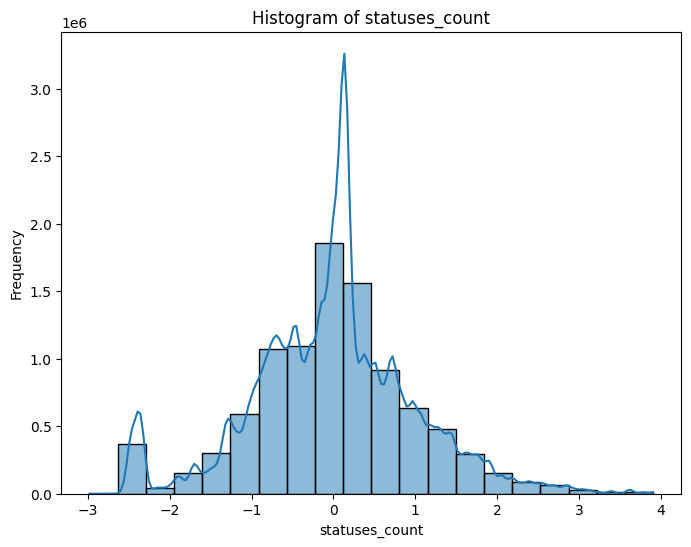

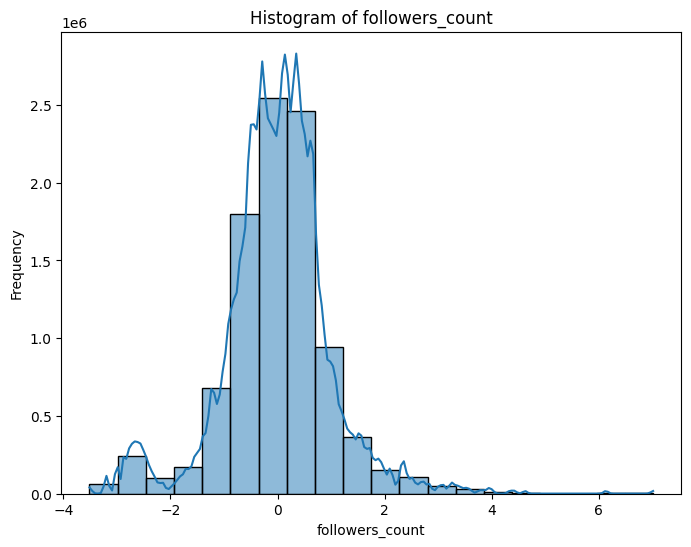

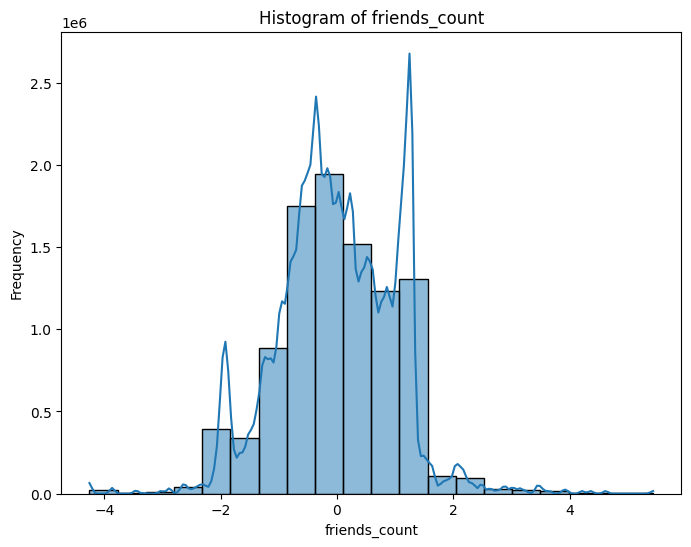

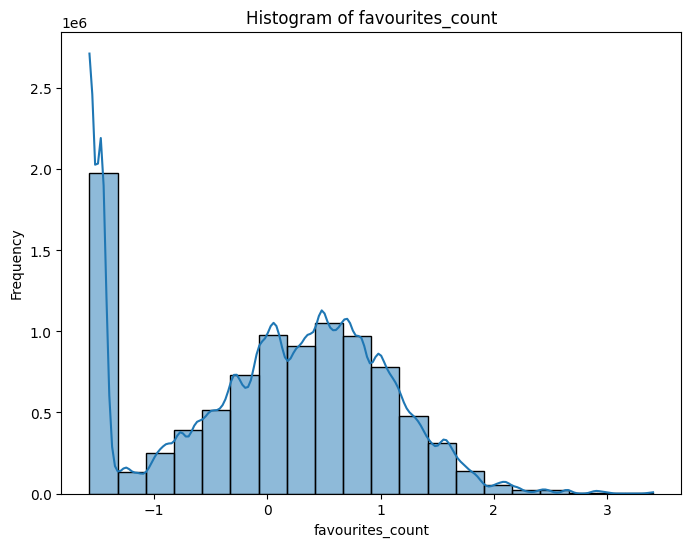

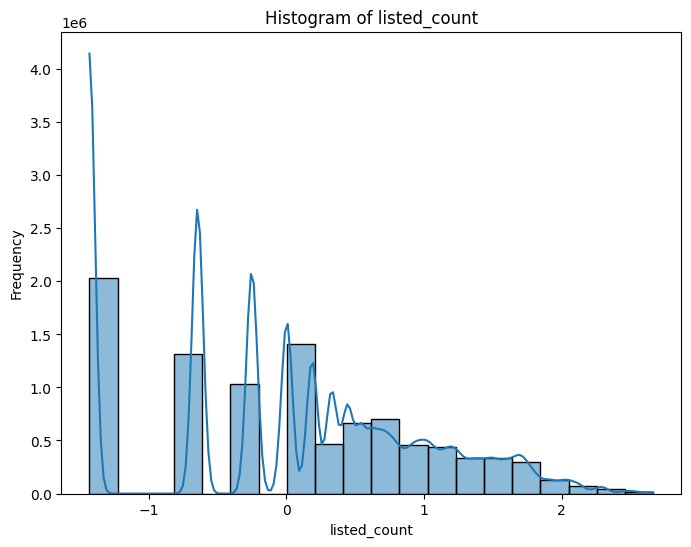

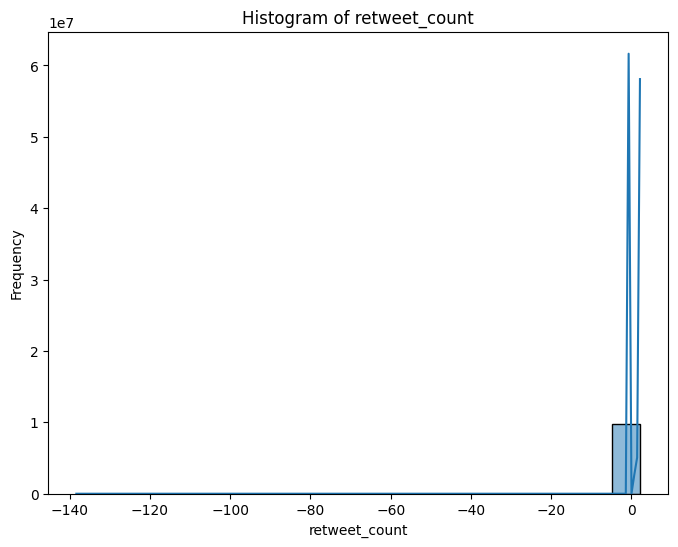

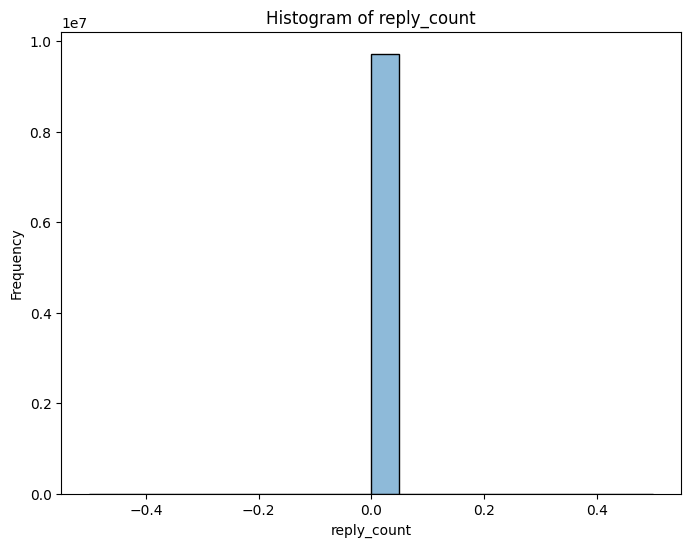

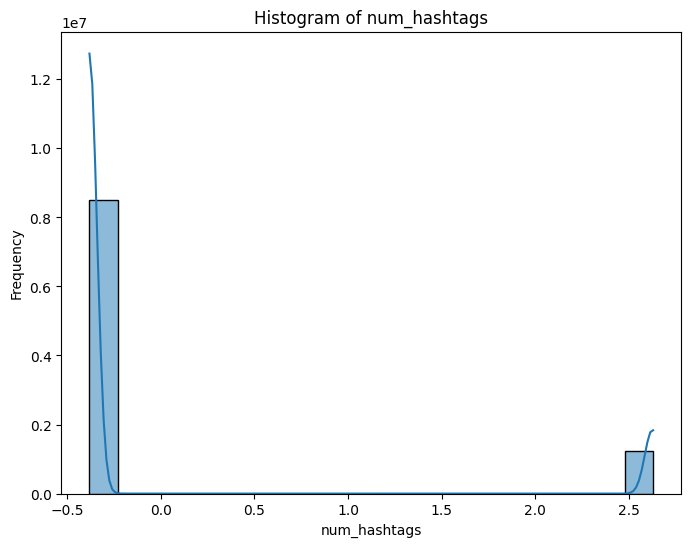

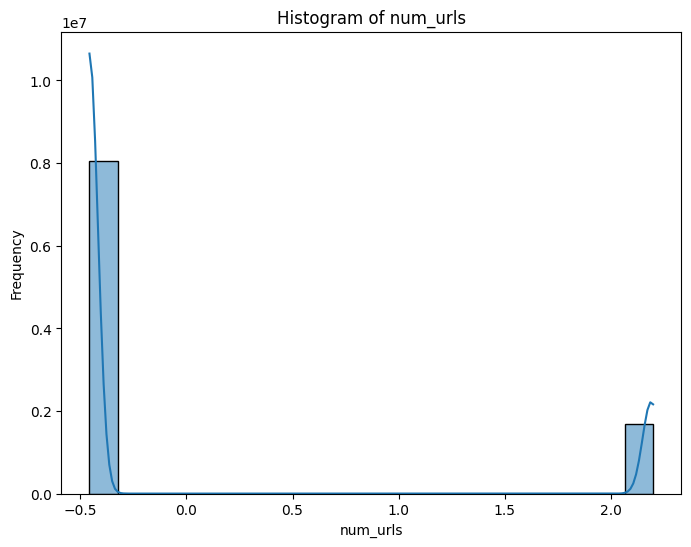

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming transformed_df is your DataFrame and numerical_columns is the list of numerical column names
numerical_columns = ['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count',
                     'retweet_count', 'reply_count', 'num_hashtags', 'num_urls']

# Plot histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(transformed_df[column], kde=True, bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


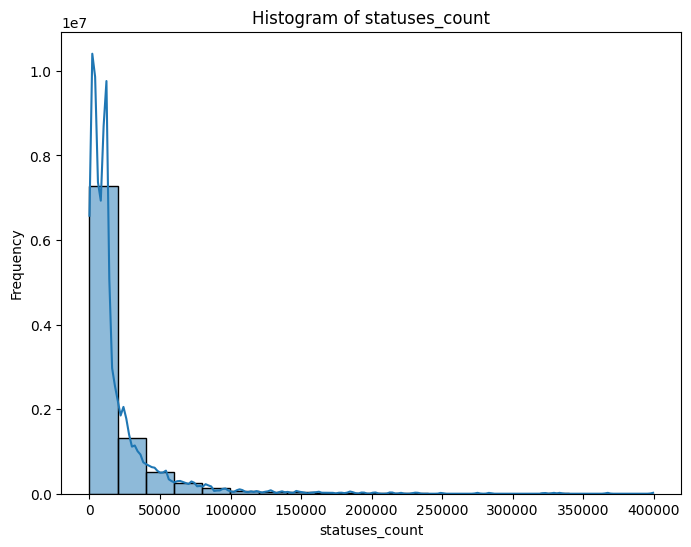

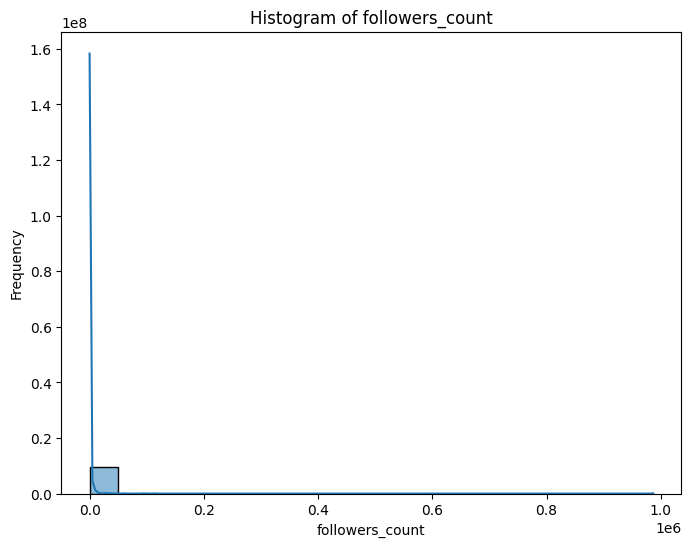

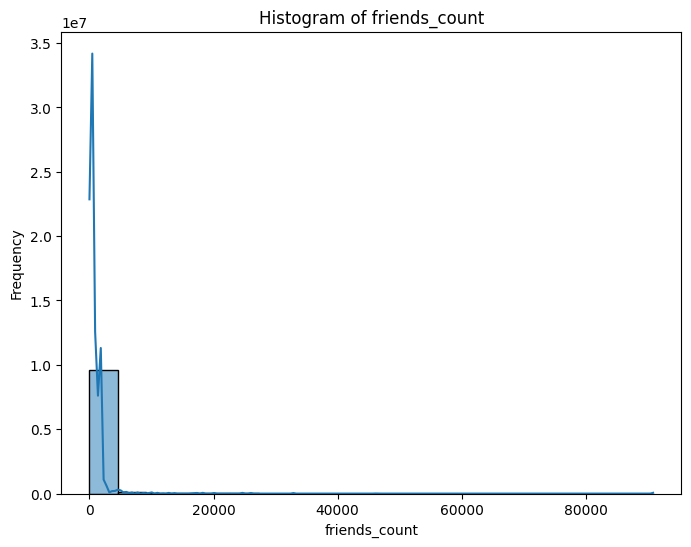

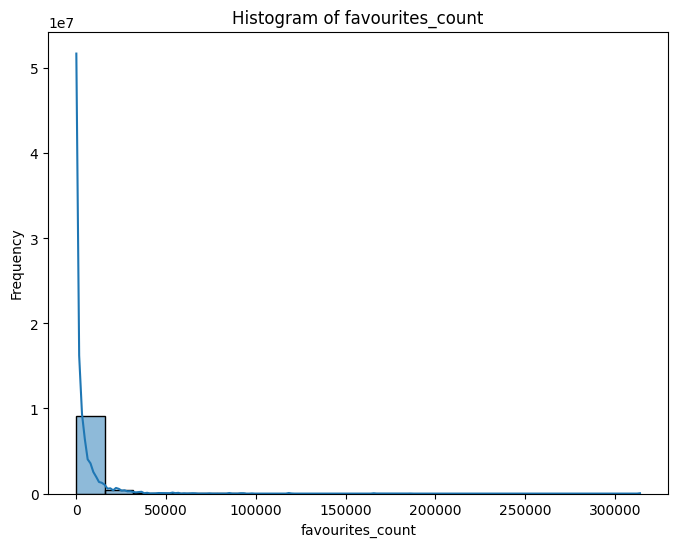

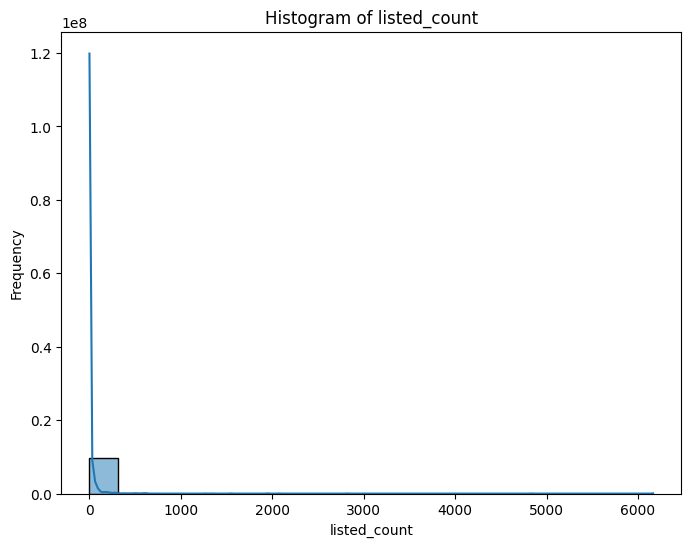

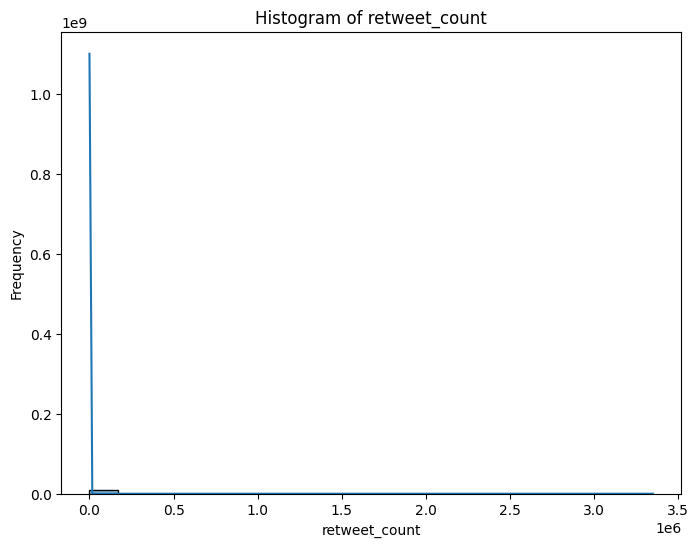

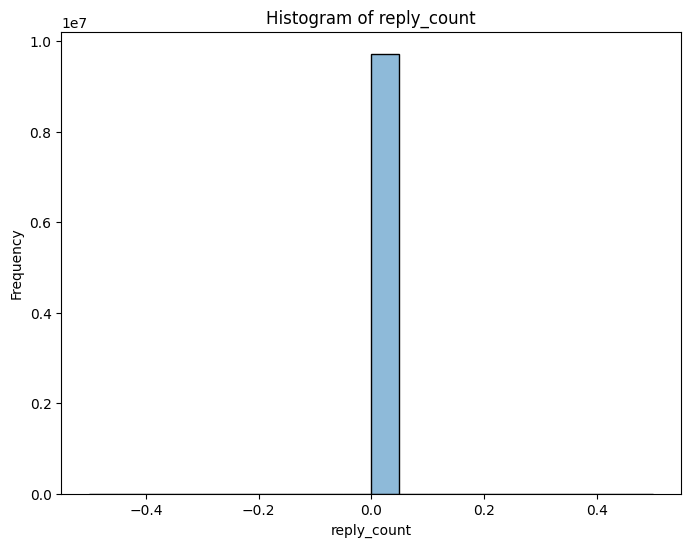

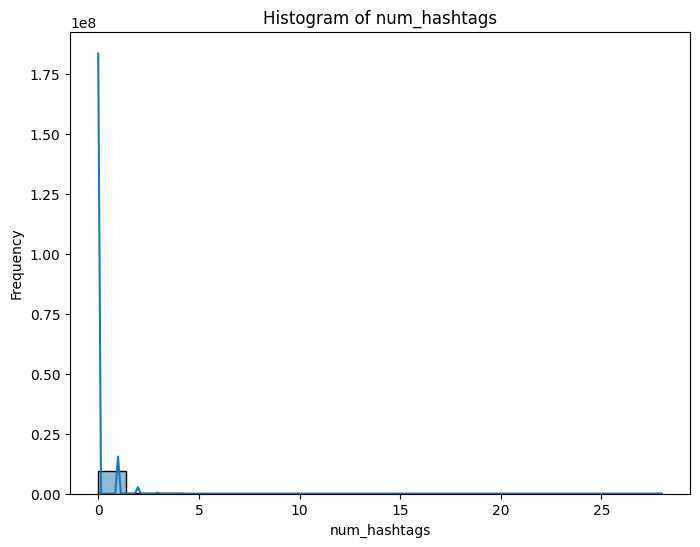

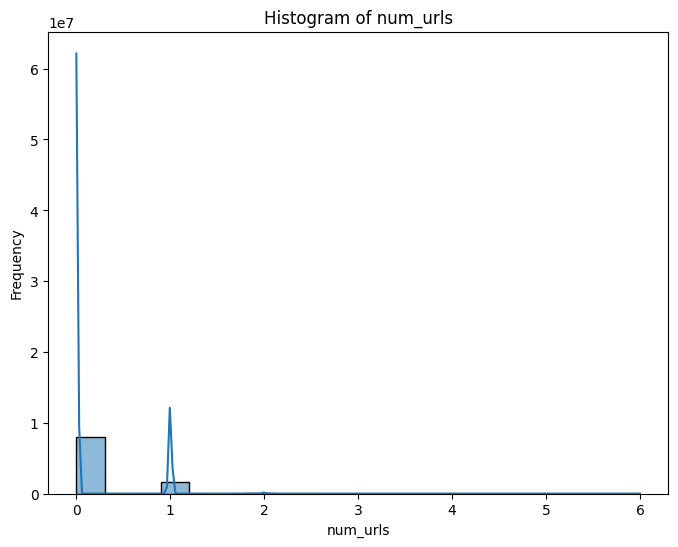

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/MiB Dataset/english_tweets.csv")
df

# Assuming df is your DataFrame and numerical_columns is the list of numerical column names
numerical_columns = ['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count',
                     'retweet_count', 'reply_count', 'num_hashtags', 'num_urls']

# Plot histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
